## Lesson 17 - Text pre processing using jieba





### Table of Contents

* [jieba 中文斷詞](#jieba)
* [斷詞與文字雲視覺化](#wordcloud)
* [詞彙與字頻度統計結果](#word_frequency)
* [Word index in dictionary](#word_index)
* [jieba 分詞 function for List and Sentense](#jieba_function)
* [提升 jieba 效率，多執行緒處理](#performance)


<a id="jieba"></a>
## jieba 中文斷詞

The previous four sections have given a general overview of the concepts of Neo4j database.
In this section and the ones that follow, we will be taking a closer look at several text process algorithms, starting here with Jieba package.

Jieba 主要是利用已建立的辭典，在對句子進行斷詞的時候，將句子的每個字與辭典中的詞彙進行比對，找到後則將其斷詞。而套件中具有計算相連的詞彙在不同的句子中出現的次數，屆此推斷這相連的詞彙很可能就是同義詞或相同詞，詞彙之間彼此相鄰出現的頻率做統計後，當高詞頻於某一個臨界值時，即可認為此詞彙是一個新詞彙。

Jieba "結巴"中文分詞，支援三種分詞模式
- 精確模式：試圖將句子最精確地切開，適合文字分析。
- 全模式：把句子中所有的可以成詞的詞語都掃描出來，速度非常快，但是不能解決歧義詞彙。
- 搜尋引擎模式：在精確模式的基底上，對較長詞彙再次切分，提高召回率，適合用於搜尋引擎分詞。

另外，套件支援簡/繁體分詞、也可自己客製化詞彙辭典。

In [1]:
# encoding=utf-8
import jieba

jieba.initialize()

seg_list = jieba.cut("我來自成功大學資訊工程系")
print(" / ".join(seg_list))

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\princ\AppData\Local\Temp\jieba.cache
Loading model cost 0.890 seconds.
Prefix dict has been built succesfully.


我來 / 自 / 成功 / 大學 / 資訊 / 工程系


呼叫jieba.cut()方法，預設使用的是「精確模式」，所以切出來的是最多可能的詞彙 (可能重複部分詞彙)，則僅需修改為「全模式」，即在其後傳入第二參數：

In [2]:
# encoding=utf-8
import jieba

jieba.initialize()

seg_list = jieba.cut("我來自成功大學資訊工程系", cut_all=True)
print(" / ".join(seg_list))

我 / 來 / 自成 / 成功 / 大 / 學 / 資 / 訊 / 工程 / 工程系


In [3]:
# encoding=utf-8
import jieba

jieba.initialize()

seg_list = jieba.cut("我們去了日本迪士尼樂園", cut_all=False)
print(" / ".join(seg_list))

seg_list = jieba.cut("We went to Disneyland in Japan", cut_all=False)
print(" / ".join([x for x in seg_list if len(x.strip())>0]))

我們 / 去 / 了 / 日本 / 迪士尼 / 樂園
We / went / to / Disneyland / in / Japan


### 使用自訂字典檔

In [4]:
# encoding=utf-8
import jieba

jieba.initialize()
jieba.load_userdict('dict/mydic.txt')

seg_list = jieba.cut("我們去了日本迪士尼樂園", cut_all=False)
print(" / ".join(seg_list))

seg_list = jieba.cut("We went to Disneyland in Japan", cut_all=False)
print(" / ".join([x for x in seg_list if len(x.strip())>0]))


我們 / 去 / 了 / 日本 / 迪士尼樂園
We / went / to / Disneyland / in / Japan


In [5]:
# encoding=utf-8
import jieba

jieba.initialize()
jieba.load_userdict('dict/mydic.txt')

seg_list = jieba.cut("我們去了日本迪士尼樂園", cut_all=False)
print(" / ".join(seg_list))

seg_list = jieba.cut("We went to Disneyland in Japan", cut_all=False)
print(" / ".join([x for x in seg_list if len(x.strip())>0]))

我們 / 去 / 了 / 日本 / 迪士尼樂園
We / went / to / Disneyland / in / Japan


迪士尼樂園被完好切出，而此時若改以「精確模式」，不僅是「迪士尼樂園」這五個字，就連「迪士尼」也能順利切出，可見得字典的重要性，當然預設的jieba字典已有，但對於中文，則有一個預設的大字典，建議在切詞之時，也使用之，而陌生或新創詞，則另外建立自訂字典，如這兒的mydic.txt檔案內容所示。

### 後宮甄嬛傳小說斷詞 - 依據每一句話

ref. https://novel101.com/novels/64db77ca-83ab-4936-8e00-42449d48f713

In [6]:
# encoding=utf-8
import jieba
import sys
from jieba import analyse

# reload(sys)
# sys.setdefaultencoding( "utf-8" )

jieba.initialize()
jieba.load_userdict('dict/mydic.txt')

input_file_name = "data/後宮甄嬛傳.txt"
output_file_name = "data/後宮甄嬛傳_jieba.txt"

input_file = open(input_file_name, "r", encoding="utf-8")
output_file = open(output_file_name, "w", encoding="utf-8")
while True:
    line = input_file.readline()
    if line:
        line = line.strip()
        if len(line)>0:
            seg_list = jieba.cut(line)
            segments = ""
            for s in seg_list:
                segments = segments + " " + s.replace("　","").replace(" ","").strip()
            segments = segments.replace("　","").strip() + "\n"
            output_file.write(segments)
    else:
        break
input_file.close()
output_file.close()

In [7]:
post_list = []
with open(output_file_name, encoding='utf-8') as f:
    post_list = f.readlines()
    post_list = [(x.strip().replace('\ufeff','')) for x in post_list]

In [8]:
# read file from jieba files
for x in post_list[:10]:
    print(x)
    print('='*10)

第一章  雲意春深
我初 進宮 的 那 一天 ， 是 個 非常 晴朗 的 日子 。 乾元 十二年 農 曆 八月 二十 ， 黃 道 吉日 。 站 在 紫禁城 空曠 的 院落 裡 可以 看見 無 比 晴好 的 天空 ， 藍澄澄 的 如 一汪 碧玉 ， 沒有 一絲雲彩 ， 偶爾有 大雁 成群 結隊 地 飛過 。
鴻雁高飛 ， 據 說 這是 一個 非常 好 的 預兆 。
毓 祥門外 整整 齊齊 地 排列 著無數 專送 秀女 的馬車 ， 所有 的 人 都 鴉雀 無聲 ， 保持 異常 的 沉默 。 我 和 來 自 各地 的 秀女 站 在 一起 ， 黑壓壓 一群 人 ， 端的 是 綠肥紅 瘦 ， 嫩 臉修 蛾 ， 脂粉 香撲 鼻 。 很少 有人 說話 ， 只 專心 照看 自己 的 脂粉 衣裳 是否 周全 ， 或是 好奇 地 偷眼 觀察 近旁 的 秀女 。
選秀 是 每個 官家 少女 的 命運 ， 每 三年 一選 ， 經過 層層 選拔 ， 將 才貌 雙全 的 未婚 女子 選入 皇宮 ， 充實後庭 。
這場 選秀 對 我 的 意義並 不大 ， 我 只 不過 來轉 一圈 充個 數便 回去 。 爹爹 說 ， 我們 的 女兒 嬌 縱慣 了 ， 怎 受得了 宮廷 約束 。 罷了 罷了 ， 平平安安 嫁個 好 郎君 也 就是 了 。
娘 總 說 像 我 女兒 這般 容貌 家世 ， 更 不肖 說 人品 才學 一定 要給 我 挑 最好 的 郎君 。 我 也 一直 是 這樣 想 的 ， 我 甄 嬛 一定 要 嫁 這世間 上 最好 的 男兒 ， 和 他 結成 連理 平平安安 白首 到 老 ， 便是 幸福 了 。 我 不能 輕易 辜負 了 自己 。
而 皇帝 坐擁 天下 ， 卻 未必 是 我 心中 認可 的 最好 的 男兒 。 至少 ， 他 不能 專心 待 我 。
因而 ， 我 並不細心 打扮 。 臉上 薄 施粉黛 ， 一身 淺綠色 挑絲 雙窠雲雁 的 時 新 宮裝 ， 合著 規矩 裁 製 的 ， 上裳 下 裙 ， 泯然 於 眾的 普通 式樣 和 顏色 ， 並無 半分 出 挑 ， 也 不小 氣 。 頭上 斜 簪 一朵 新摘 的 白芙蓉 ， 除此之外 只 挽 一支 碧玉 七寶玲瓏 簪 ， 綴 下 細細 的 銀絲 串珠 流蘇 ， 略略 自矜 身份 ， 以顯 並非 一般 的 小家碧玉 ， 可以 輕易 小瞧 了

### stopwords of jieba

使用停用詞，再對小說斷詞一次。

In [9]:
# encoding=utf-8
import jieba
import sys
from jieba import analyse

# reload(sys)
# sys.setdefaultencoding( "utf-8" )

jieba.initialize()
jieba.load_userdict('dict/mydic.txt')

# load stopwords set
stopwordset = set()
with open('dict/stopwords.txt','r',encoding='utf-8') as sw:
    for line in sw:
        stopwordset.add(line.strip('\n'))

input_file_name = "data/後宮甄嬛傳.txt"
output_file_name = "data/後宮甄嬛傳_jieba.txt"

input_file = open(input_file_name, "r", encoding="utf-8")
output_file = open(output_file_name, "w", encoding="utf-8")
while True:
    line = input_file.readline()
    if line:
        line = line.strip()
        if len(line)>0:
            seg_list = jieba.cut(line)
            segments = ""
            for s in seg_list:
                if (s not in stopwordset) and len(s)>1:
                    segments = segments + " " + s.replace("　","").replace(" ","").strip()
            if len(segments.strip())>0:
                segments = segments.replace("　","").strip() + "\n"
                output_file.write(segments)
    else:
        break
input_file.close()
output_file.close()

In [10]:
# read file from jieba files
for x in post_list[:10]:
    print(x)
    print('='*10)

第一章  雲意春深
我初 進宮 的 那 一天 ， 是 個 非常 晴朗 的 日子 。 乾元 十二年 農 曆 八月 二十 ， 黃 道 吉日 。 站 在 紫禁城 空曠 的 院落 裡 可以 看見 無 比 晴好 的 天空 ， 藍澄澄 的 如 一汪 碧玉 ， 沒有 一絲雲彩 ， 偶爾有 大雁 成群 結隊 地 飛過 。
鴻雁高飛 ， 據 說 這是 一個 非常 好 的 預兆 。
毓 祥門外 整整 齊齊 地 排列 著無數 專送 秀女 的馬車 ， 所有 的 人 都 鴉雀 無聲 ， 保持 異常 的 沉默 。 我 和 來 自 各地 的 秀女 站 在 一起 ， 黑壓壓 一群 人 ， 端的 是 綠肥紅 瘦 ， 嫩 臉修 蛾 ， 脂粉 香撲 鼻 。 很少 有人 說話 ， 只 專心 照看 自己 的 脂粉 衣裳 是否 周全 ， 或是 好奇 地 偷眼 觀察 近旁 的 秀女 。
選秀 是 每個 官家 少女 的 命運 ， 每 三年 一選 ， 經過 層層 選拔 ， 將 才貌 雙全 的 未婚 女子 選入 皇宮 ， 充實後庭 。
這場 選秀 對 我 的 意義並 不大 ， 我 只 不過 來轉 一圈 充個 數便 回去 。 爹爹 說 ， 我們 的 女兒 嬌 縱慣 了 ， 怎 受得了 宮廷 約束 。 罷了 罷了 ， 平平安安 嫁個 好 郎君 也 就是 了 。
娘 總 說 像 我 女兒 這般 容貌 家世 ， 更 不肖 說 人品 才學 一定 要給 我 挑 最好 的 郎君 。 我 也 一直 是 這樣 想 的 ， 我 甄 嬛 一定 要 嫁 這世間 上 最好 的 男兒 ， 和 他 結成 連理 平平安安 白首 到 老 ， 便是 幸福 了 。 我 不能 輕易 辜負 了 自己 。
而 皇帝 坐擁 天下 ， 卻 未必 是 我 心中 認可 的 最好 的 男兒 。 至少 ， 他 不能 專心 待 我 。
因而 ， 我 並不細心 打扮 。 臉上 薄 施粉黛 ， 一身 淺綠色 挑絲 雙窠雲雁 的 時 新 宮裝 ， 合著 規矩 裁 製 的 ， 上裳 下 裙 ， 泯然 於 眾的 普通 式樣 和 顏色 ， 並無 半分 出 挑 ， 也 不小 氣 。 頭上 斜 簪 一朵 新摘 的 白芙蓉 ， 除此之外 只 挽 一支 碧玉 七寶玲瓏 簪 ， 綴 下 細細 的 銀絲 串珠 流蘇 ， 略略 自矜 身份 ， 以顯 並非 一般 的 小家碧玉 ， 可以 輕易 小瞧 了

<a id="wordcloud"></a>
## 斷詞與文字雲視覺化

In [11]:
import jieba
import numpy as np

jieba.initialize()
jieba.set_dictionary('dict/dict.big.txt')
jieba.load_userdict('dict/mydic.txt')
stops = ()
with open('dict/stopwords.txt', 'r', encoding='utf8') as f:
    stops = f.read().split('\n') 

Building prefix dict from D:\Programming\Python\Neo4j\課程\dict\dict.big.txt ...
Dumping model to file cache C:\Users\princ\AppData\Local\Temp\jieba.u2119b7327cb8dafa65534ff0e37256b6.cache
Loading model cost 1.721 seconds.
Prefix dict has been built succesfully.


### 停用詞

In [12]:
count = 15
num = len(stops)//count
for i in range(num):
    print(", ".join(stops[i*num : (i+1)*num]))

,, ?, 、, 。, “, ”, 《, 》, 👭, 🍀, 💢, 🎬, 🌹, 🉐, ✔, 🎄, 🐽, ！, 〔, 〕, ‧, □, ＂, ，, ：, ；, ？, ▼, ►, ★, ↓, ︱, 「, 」, 【, 】, ️, goo, gl, bit, ly, PO, http, https, from, com, gmail, cc, 人民, 原來, 末##末, 啊, 阿, 哎, 哎呀, 哎喲, 唉, 俺, 俺們, 按, 按照, 吧, 吧噠, 把, 罷了, 被, 本, 本著, 比, 比方, 比如, 鄙人, 彼, 彼此, 邊, 別, 別的, 別說, 並, 並且, 不比, 不成, 不單, 不但, 不獨, 不管, 不光, 不過, 不僅, 不拘
不論, 不怕, 不然, 不如, 不特, 不惟, 不問, 不只, 朝, 朝著, 趁, 趁著, 乘, 衝, 除, 除此之外, 除非, 除了, 此, 此間, 此外, 從, 從而, 打, 待, 但, 但是, 當, 當著, 到, 得, 的, 的話, 等, 等等, 地, 第, 叮咚, 對, 對於, 多, 多少, 而, 而況, 而且, 而是, 而外, 而言, 而已, 爾後, 反過來, 反過來說, 反之, 非但, 非徒, 否則, 嘎, 嘎登, 該, 趕, 個, 各, 各個, 各位, 各種, 各自, 給, 根據, 跟, 故, 故此, 固然, 關於, 管, 歸, 果然, 果真, 過, 哈, 哈哈, 呵, 和, 何, 何處, 何況, 何時, 嘿, 哼, 哼唷, 呼哧
乎, 譁, 還是, 還有, 換句話說, 換言之, 或, 或是, 或者, 極了, 及, 及其, 及至, 即, 即便, 即或, 即令, 即若, 即使, 幾, 幾時, 己, 既, 既然, 既是, 繼而, 加之, 假如, 假若, 假使, 鑑於, 將, 較, 較之, 叫, 接著, 結果, 借, 緊接著, 進而, 盡, 儘管, 經, 經過, 就, 就是, 就是說, 據, 具體地說, 具體說來, 開始, 開外, 靠, 咳, 可, 可見, 可是, 可以, 況且, 啦, 來, 來著, 離, 例如, 哩, 連, 連同, 兩者, 了, 臨, 另, 另外, 另一方面, 論, 嘛, 嗎, 慢說, 漫說, 冒, 麼, 每, 每當, 們, 莫若, 某, 某個, 某些, 拿, 哪, 哪邊
哪兒, 哪個, 哪裡, 哪年, 哪怕

### 將小說合併為一個大的字串

In [13]:
input_file_name = "data/後宮甄嬛傳.txt"
input_file = open(input_file_name, "r", encoding="utf-8")
testStr = ""
while True:
    line = input_file.readline()
    if line:
        line = line.strip()
        if len(line)>0:
            testStr = testStr+" "+line
    else:
        break

In [14]:
len(testStr)

1486203

### 斷詞並去除停用字，與「詞彙」頻度統計結果

In [15]:
from collections import Counter
from wordcloud import WordCloud
from matplotlib import pyplot as plt

In [16]:
stops.append('\n')
stops.append('\n\n')
terms = [t for t in jieba.cut(testStr, cut_all=True) if (t.strip() not in stops) and len(t.strip())>1]
sorted(Counter(terms).items(), key=lambda x:x[1], reverse=True)

[('皇上', 3954),
 ('皇后', 2827),
 ('娘娘', 2432),
 ('臣妾', 1726),
 ('姐姐', 1432),
 ('太后', 1348),
 ('微微', 1221),
 ('宮中', 1096),
 ('已經', 1062),
 ('孩子', 1000),
 ('妹妹', 982),
 ('不知', 933),
 ('王爺', 925),
 ('本宮', 913),
 ('婕妤', 874),
 ('自然', 841),
 ('小姐', 833),
 ('輕輕', 778),
 ('我心', 750),
 ('奴婢', 737),
 ('今日', 730),
 ('微笑', 685),
 ('身邊', 676),
 ('看著', 663),
 ('聲道', 654),
 ('聲音', 620),
 ('心中', 619),
 ('宮裡', 619),
 ('不敢', 594),
 ('身子', 590),
 ('娘子', 587),
 ('太醫', 585),
 ('一眼', 584),
 ('目光', 583),
 ('喜歡', 571),
 ('神色', 562),
 ('不好', 546),
 ('太妃', 542),
 ('下去', 532),
 ('女子', 526),
 ('哥哥', 517),
 ('明白', 512),
 ('說話', 508),
 ('淡淡', 508),
 ('帝姬', 505),
 ('以為', 499),
 ('心裡', 487),
 ('好好', 486),
 ('真是', 483),
 ('身上', 481),
 ('片刻', 478),
 ('宮女', 476),
 ('從前', 474),
 ('曉得', 461),
 ('含笑', 455),
 ('不覺', 455),
 ('貴人', 455),
 ('緩緩', 454),
 ('後宮', 451),
 ('過來', 433),
 ('十分', 433),
 ('一口', 433),
 ('下來', 433),
 ('點頭', 432),
 ('一句', 431),
 ('起身', 425),
 ('夫人', 420),
 ('卻是', 405),
 ('不由', 400),
 ('不住', 399),
 ('一日', 39

### 產生文字雲

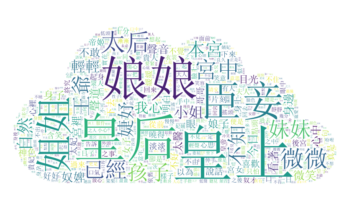

<Figure size 432x288 with 0 Axes>

In [17]:
%matplotlib inline
from PIL import Image

alice_mask = np.array(Image.open("images/cloud_mask7.png"))
wc = WordCloud(background_color="white", max_words=2000, mask=alice_mask, font_path="font/simsun.ttf")
wc.generate_from_frequencies(Counter(terms))

#store to file
picture_name = "images/lesson15_jieba.png"
wc.to_file(picture_name)

# show word cloud
#plt.rcParams["figure.figsize"] = (100,80)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.figure()
plt.show()

<a id="word_frequency"></a>
## 「詞彙」與「字」頻度統計結果

In [18]:
import os, codecs
from collections import Counter

def get_words(txt):
    seg_list = list(txt)
    # load stopwords set
    stopwordset = set()
    with open('dict/stopwords.txt','r',encoding='utf-8') as sw:
        for line in sw:
            stopwordset.add(line.strip('\n'))
    c = Counter()
    for x in seg_list:
        if len(x)>0 and x != '\r\n' and x not in stopwordset and x !='\r' and x !='\n' and x != '\x1a' and x !='\ufeff':
            c[x] += 1
    print('常用詞頻度統計結果')
    print(dict(c))

if __name__ == '__main__':
    with codecs.open('data/後宮甄嬛傳.txt', 'r', encoding='utf-8') as f:
        txt = f.read()
    get_words(txt)

常用詞頻度統計結果
{'章': 346, ' ': 253, '雲': 671, '意': 3976, '春': 750, '深': 1291, '進': 1481, '宮': 6291, '天': 1961, '非': 657, '晴': 71, '朗': 173, '日': 4284, '子': 8546, '乾': 211, '元': 431, '十': 1347, '年': 2071, '農': 5, '曆': 1, '月': 1978, '黃': 433, '道': 13636, '吉': 100, '站': 336, '紫': 410, '禁': 315, '城': 225, '空': 552, '曠': 26, '院': 248, '落': 1513, '裡': 3885, '無': 3875, '好': 6318, '藍': 212, '澄': 51, '汪': 73, '碧': 1908, '玉': 1821, '絲': 847, '彩': 192, '偶': 222, '爾': 198, '雁': 59, '成': 1242, '群': 86, '結': 352, '隊': 13, '飛': 423, '鴻': 89, '高': 726, '說': 5649, '預': 47, '兆': 39, '毓': 4, '祥': 231, '門': 722, '外': 1466, '整': 389, '排': 140, '列': 62, '數': 641, '專': 115, '送': 650, '秀': 319, '女': 2282, '馬': 342, '車': 169, '人': 9330, '鴉': 57, '雀': 64, '聲': 3902, '保': 460, '持': 268, '異': 296, '沉': 1329, '默': 692, '黑': 243, '壓': 203, '端': 988, '綠': 361, '肥': 16, '紅': 1419, '瘦': 112, '嫩': 78, '臉': 1426, '修': 293, '蛾': 6, '脂': 164, '粉': 378, '香': 1214, '撲': 252, '鼻': 143, '少': 965, '話': 2393, '只': 6165, '心': 8460, '

### 常用詞頻度統計結果

In [19]:
import os, codecs
import jieba
from collections import Counter
 
def get_words(txt):
    seg_list = jieba.cut(txt)
    c = Counter()
    stopwordset = set()
    with open('dict/stopwords.txt','r',encoding='utf-8') as sw:
        for line in sw:
            stopwordset.add(line.strip('\n'))
    for x in seg_list:
        if len(x)>0 and x != '\r\n' and x not in stopwordset and x !='\r' and x !='\n':
            c[x] += 1
    print('常用詞頻度統計結果')
    for (k,v) in c.most_common(100):
        print('%s%s %s  %d' % ('  '*(5-len(k)), k, '*'*int(v/3), v))

if __name__ == '__main__':
    with codecs.open('data/後宮甄嬛傳.txt', 'r', encoding='utf-8') as f:
        txt = f.read()
    get_words(txt)

常用詞頻度統計結果
        道 ********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

<a id="word_index"></a>
## Word index in dictionary

In [20]:
import os, codecs
from collections import Counter

def get_words(content):
    seg_list = list(content)
    word_index_dict = {}
    tmp_list = []

    # load stopwords set
    stopwordset = set()
    with open('dict/stopwords.txt','r',encoding='utf-8') as sw:
        for line in sw:
            stopwordset.add(line.strip('\n'))
    c = Counter()
    for x in seg_list:
        if len(x)>0 and x != '\r\n' and x not in stopwordset and x !='\r' and x !='\n' and x != '\x1a' and x !='\ufeff' and x !=' ' and x !='○':
            c[x] += 1
    temp_dic = dict(c)
    word_index_dict = {}
    index_word_dict = {}
    for k,v in enumerate(temp_dic):
        index_word_dict[k] = v
        word_index_dict[v] = k
    
    int_word = word_index_dict["宮"]
    # 6
    print(int_word)
    print(index_word_dict[int_word])
    
if __name__ == '__main__':
    with codecs.open('data/後宮甄嬛傳.txt', 'r', encoding='utf-8') as f:
        content = f.read()
    get_words(content)

6
宮


<a id="jieba_function"></a>
## 建立 jieba 分詞 function 取得list, 傳入單一句子

In [21]:
import os, codecs
import jieba
from collections import Counter

jieba.initialize()

def _david_jieba_cut(text, cut_all):
    punct = set(u''':!),.:;?]}$¢'"、。〉》」』】〕〗〞︰︱︳﹐､﹒﹔﹕﹖﹗﹚﹜﹞！），．：；？｜｝︴︶︸︺︼︾﹀﹂﹄﹏､～￠々‖•·ˇˉ―--′’”([{£¥'"‵〈《「『【〔〖（［｛￡￥〝︵︷︹︻︽︿﹁﹃﹙﹛﹝（｛“‘-—_…''')
    # punct |= set(exception)
    words = [word for word in jieba.cut(text, cut_all=cut_all) if (len(word.strip()) >= 2) and ( not any(ext in word for ext in punct) )]
    return words

def get_words(content):
    seg_list = jieba.cut(content, cut_all=cut_all)
    print(type(seg_list))
    print(" / ".join(seg_list))

    
if __name__ == '__main__':
    content = "我來自成功大學資訊工程系"
    print(_david_jieba_cut(content, False))

['來自', '成功', '大學', '資訊', '工程系']


### 建立 jieba 分詞 function 取得 list, 傳入 list

In [22]:
import time
import jieba

jieba.initialize()

In [23]:
input_file_name = "data/後宮甄嬛傳.txt"
with open(input_file_name, 'r', encoding="utf8") as file:
    c_list = file.readlines()
file.close()

res_list = []
t1 = time.time()
for sentense in c_list:
    res_list.append(_david_jieba_cut(sentense, False))
t2 = time.time()
tm_cost = t2-t1
print('time cost: {}'.format(tm_cost))
print('speed %s bytes/second' % (len(content)/tm_cost))

time cost: 15.359086036682129
speed 0.781296489344508 bytes/second


In [24]:
res_list[:1]

[['第一章', '雲意春深']]

<a id="performance"></a>
## 提升 jieba 效率，多執行緒處理, 變成一大文件

方法一：使用內建的 jieba.enable_parallel()

In [25]:
input_file_name = "data/後宮甄嬛傳.txt"
with open(input_file_name, 'r', encoding="utf8") as file:
    c = file.read()
file.close()

In [26]:
# Remove UTF-8 BOM
content = c.replace('\u3000\u3000','').replace('\n',' ')

In [27]:
import time
import jieba

jieba.initialize()

# only support posix system, ubuntu, linux etc.
#jieba.enable_parallel()

In [28]:
def _david_jieba_cut(text, cut_all):
    punct = set(u''':!),.:;?]}$¢'"、。〉》」』】〕〗〞︰︱︳﹐､﹒﹔﹕﹖﹗﹚﹜﹞！），．：；？｜｝︴︶︸︺︼︾﹀﹂﹄﹏､～￠々‖•·ˇˉ―--′’”([{£¥'"‵〈《「『【〔〖（［｛￡￥〝︵︷︹︻︽︿﹁﹃﹙﹛﹝（｛“‘-—_…''')
    # punct |= set(exception)
    words = [word for word in jieba.cut(text, cut_all=cut_all) if (len(word.strip()) >= 2) and ( not any(ext in word for ext in punct) )]
    return words

def get_words(content):
    seg_list = jieba.cut(content, cut_all=cut_all)
    print(type(seg_list))
    print(" / ".join(seg_list))

t1 = time.time()
res_list = _david_jieba_cut(content, False)
t2 = time.time()
tm_cost = t2-t1
print('time cost: {}'.format(tm_cost))
print('speed %s bytes/second' % (len(content)/tm_cost))

time cost: 14.507132768630981
speed 104024.89754992517 bytes/second


In [29]:
res_list[:5]

['第一章', '雲意春深', '初進宮', '一天', '非常']

### Windows multiprocessing , 傳入 list

方法二：使用 multiprocessing.dummy on Windows 10

In [30]:
import time
import jieba
import pandas as pd
#from multiprocessing import Pool,cpu_count

jieba.initialize()

input_file_name = "data/後宮甄嬛傳.txt"
with open(input_file_name, 'r', encoding="utf8") as file:
    c_list = file.read().splitlines()
file.close()
c_list[:10]

['\u3000\u3000第一章 雲意春深',
 '',
 '\u3000\u3000我初進宮的那一天，是個非常晴朗的日子。乾元十二年農曆八月二十，黃道吉日。站在紫禁城空曠的院落裡可以看見無比晴好的天空，藍澄澄的如一汪碧玉，沒有一絲雲彩，偶爾有大雁成群結隊地飛過。',
 '',
 '\u3000\u3000鴻雁高飛，據說這是一個非常好的預兆。',
 '',
 '\u3000\u3000毓祥門外整整齊齊地排列著無數專送秀女的馬車，所有的人都鴉雀無聲，保持異常的沉默。我和來自各地的秀女站在一起，黑壓壓一群人，端的是綠肥紅瘦，嫩臉修蛾，脂粉香撲鼻。很少有人說話，只專心照看自己的脂粉衣裳是否周全，或是好奇地偷眼觀察近旁的秀女。',
 '',
 '\u3000\u3000選秀是每個官家少女的命運，每三年一選，經過層層選拔，將才貌雙全的未婚女子選入皇宮，充實後庭。',
 '']

In [31]:
c_list = [c.strip().replace('\u3000\u3000','').replace('\n',' ') for c in c_list if len(c.strip())>0]

In [32]:
df_ = pd.DataFrame(c_list, columns=['content'])
df_['content'] = df_['content'].str.rstrip('\n')
df_ = df_[df_ != '']
df_ = df_[ (df_["content"].notnull()) & (df_["content"]!=u'') ]
df_ = df_.dropna(subset=['content'], inplace=False)
df_.head()

,content
0,第一章 雲意春深
1,我初進宮的那一天，是個非常晴朗的日子。乾元十二年農曆八月二十，黃道吉日。站在紫禁城空曠的院落...
2,鴻雁高飛，據說這是一個非常好的預兆。
3,毓祥門外整整齊齊地排列著無數專送秀女的馬車，所有的人都鴉雀無聲，保持異常的沉默。我和來自各地...
4,選秀是每個官家少女的命運，每三年一選，經過層層選拔，將才貌雙全的未婚女子選入皇宮，充實後庭。


In [33]:
import multiprocessing.dummy as multiprocessing

cpu_count = 4

def jiebaCut(x):
    lst = list(jieba.lcut(str(x).strip(), cut_all=False))
    return [lt for lt in lst if len(lt.strip())>1]

t1 = time.time()
with multiprocessing.Pool(processes=(cpu_count)) as pool:
    res_list = pool.map(jiebaCut, df_['content'])
t2 = time.time()
tm_cost = t2-t1
print('time cost: {}'.format(tm_cost))
print('speed %s bytes/second' % (len(content)/tm_cost))

time cost: 10.884004592895508
speed 138653.28584894765 bytes/second


In [34]:
res_list[:1]

[['第一章', '雲意春深']]

#### 修改function以map取代for

In [35]:
def jiebaCut(x):
    lst = list(jieba.lcut(str(x).strip(), cut_all=False))
    return [lt for lt in lst if len(lt.strip())>1]

t1 = time.time()
df_['content_jieba'] = list(map(jiebaCut, df_['content']))
t2 = time.time()
tm_cost = t2-t1
print('time cost: {}'.format(tm_cost))
print('speed %s bytes/second' % (len(content)/tm_cost))

time cost: 9.617396354675293
speed 156913.8823384753 bytes/second


In [36]:
df_.head()

,content,content_jieba
0,第一章 雲意春深,"[第一章, 雲意春深]"
1,我初進宮的那一天，是個非常晴朗的日子。乾元十二年農曆八月二十，黃道吉日。站在紫禁城空曠的院落...,"[初進宮, 一天, 非常, 晴朗, 日子, 乾元, 十二年, 八月, 二十, 黃道吉日, 紫..."
2,鴻雁高飛，據說這是一個非常好的預兆。,"[鴻雁, 據說, 這是, 一個, 非常, 預兆]"
3,毓祥門外整整齊齊地排列著無數專送秀女的馬車，所有的人都鴉雀無聲，保持異常的沉默。我和來自各地...,"[門外, 整整齊齊, 排列, 無數, 專送, 秀女, 馬車, 所有, 鴉雀無聲, 保持, 異..."
4,選秀是每個官家少女的命運，每三年一選，經過層層選拔，將才貌雙全的未婚女子選入皇宮，充實後庭。,"[選秀, 每個, 官家, 少女, 命運, 三年, 一選, 經過, 層層, 選拔, 才貌雙全,..."


利用Pandas.DataFrame與map一比一的進行jieba，與平行處理並行，會得到更加快速的結果。

## Homework

- 尋找自己想要分析的文章、新聞
- 提供詞頻或者字頻
- 建立文字雲進行
- 告訴大家你的發現